# Estimation puissance à fournir

Dans ce code, on essaie de déterminer la puissance nécessaire pour chauffer les bâtiments du port (en hiver) ou alors les refroidir (en été). On cherchera ensuite l'énergie thermique consommée par les bâtiments.

### Importation des librairies

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

## Récupération des données

En première approximation pour calculer les pertes par les surfaces latérales et le plafond, on va prendre la racine carrée de chaque surface et la multiplier par la hauteur.

In [95]:
nombre_batiment = int(input('quel est le nombre de bâtiments considérés ?'))

batiment = [(0,0,0) for i in range(nombre_batiment)]

#type_batiment = [O for i in range(nombre_batiment)] #type de batiment --> deuxième étape
surface_totale = [0 for i in range(nombre_batiment)] #surfaces utiles pour calculer les pertes
K = [0 for i in range(nombre_batiment)]

for i in range(nombre_batiment):

    #on récupère le nom du bâtiment
    while True:
        try:
            nom = input(f'quel est le nom du batiment {i} ?')
            break
        except ValueError:
            print('donnée invalide ! réessayez')
            
    #on récupère les coefficients de perte
    while True:
        try:
            R = float(input(f'quel est le coefficient de perte du batiment {nom} ?'))
            break
        except ValueError:
            print('donnée invalide ! réessayez')
    K[i] = 1/R
    
    #on récupère la surface du batiment
    while True:
        try:
            surface_sol = float(input(f'quelle est la surface au sol du batiment {nom} ?'))
            break
        except ValueError:
            print('donnée invalide ! réessayez')

    #on récupère la hauteur du batiment
    while True:
        try:
            hauteur_typique = float(input(f'quelle est la hauteur typique du batiment {nom} ?'))
            break
        except ValueError:
            print('donnée invalide ! réessayez')

    #on calcule la longueur typique puis la surface latérale
    longueur_typique = sqrt(surface_sol)

    #on calcule la surface totale utile pour le calcul des pertes
    surface_totale[i] = 2*surface_sol + 4*longueur_typique*hauteur_typique

    #on met tout ça dans la liste batiment
    batiment[i] = (nom,surface_totale[i],K[i])

quel est le nombre de bâtiments considérés ? 2
quel est le nom du batiment 0 ? lot 3
quel est le coefficient de perte du batiment lot 3 ? 3
quelle est la surface au sol du batiment lot 3 ? 2
quelle est la hauteur typique du batiment lot 3 ? 1
quel est le nom du batiment 1 ? lot 5
quel est le coefficient de perte du batiment lot 5 ? 1
quelle est la surface au sol du batiment lot 5 ? 3
quelle est la hauteur typique du batiment lot 5 ? 2


### Calcul des volumes

In [96]:
volume_batiment = [0 for i in range(nombre_batiment)]

for i in range(nombre_batiment):
    volume_batiment[i] = surface_batiment[i]*hauteur_batiment[i]

### Représentation graphique de la puissance nécessaire sur l'année

On va tracer le graphe de la puissance nécessaire sur l'année par mois. On va considérer une valeur moyenne de la température extérieur par mois. On considère que les mois d'hiver sont de novembre à avril, et que les mois d'été sont de mai à octobre.

In [97]:
#on considère que la température idéale est de 22 degrés en été et de 24 degrés en hiver

#T_exterieur = int(input('quelle est la température extérieur en celcius ?')) #on pourra récupérer des données sur un an
#T_voulue = int(input('quelle est la température voulue dans le bâtiment en celcius ?'))

T_exterieur = [8,8,10,13,17,21,23,24,20,17,12,9] #température par mois
T_voulue = [24,24,24,24,22,22,22,22,22,22,24,24] #température par mois

puissance_batiment = [[0 for i in range(nombre_batiment)] for j in range(12)]

valeur_puissance_totale = [0 for j in range(12)]

for j in range(12):
    
    for i in range(nombre_batiment):
        puissance_batiment[j][i] = surface_totale[i]*np.abs(T_exterieur[j] - T_voulue[j])*valeurs_K[i]

    valeur_puissance_totale[j] = sum(puissance_batiment[:][j])

In [98]:
print(valeur_puissance_totale)

[np.float64(118.05304284017359), np.float64(118.05304284017359), np.float64(103.29641248515188), np.float64(81.16146695261935), np.float64(36.89157588755425), np.float64(7.378315177510849), np.float64(7.378315177510849), np.float64(14.756630355021699), np.float64(14.756630355021699), np.float64(36.89157588755425), np.float64(88.53978213013019), np.float64(110.67472766266275)]


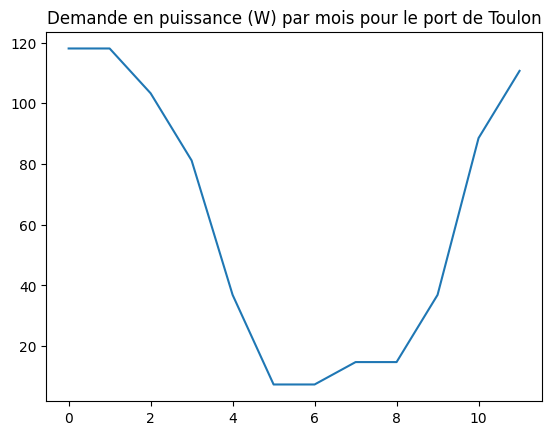

In [99]:
plt.plot(valeur_puissance_totale)
plt.title('Demande en puissance (W) par mois pour le port de Toulon')
plt.show()

In [ ]:
#degré jour unifié = dju